# 03 Geometric Machine Learning for Shapes

## B) Supervised Learning: Classification

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/03_class_header.png" width=650px alt="default"/></center>

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - **B) Classification**
  - C) Regression
  - D) Clustering
  - E) Dimension Reduction

### Supervised Learning in ML

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: _Supervised learning_ refers to the task of learning a function that maps an input $X$ to an output $Y$ based on example input-output pairs. We say that the method is:
- a _classification_ if the outputs are categorical,
- a _regression_ if the outputs are quantitative.

<center><img src="figs/03_sl2.png" width=900px alt="default"/></center>
<center>Supervised Learning</center>

### Review of Traditional Classification

$\color{#EF5645}{\text{Given data}}$:
- $(X_1, ..., X_n)$: 
  - inputs, e.g. brain shapes for different subjects.
- $(y_1, ..., y_n)$: 
  - outputs ("labels") in $\{0, 1\}$, e.g. if shizophrenia (1 - red) or not (0 - blue).

<center><img src="figs/03_class.png" width=250px alt="default"/></center>
<center>Inputs: $X_1, ..., X_n \in \mathbb{R}^2$. Outputs: $y_1, ..., y_n$ represented as colors.</center>

$\rightarrow \color{#EF5645}{\text{Goal}}$: Build $f$ that predicts if a brain shows shizophrenia from new $X_\text{new}.$


### Review of Traditional Classification: 4 Steps


1. $\color{#EF5645}{\text{Modeling:}}$
- $\color{#EF5645}{\text{Decide on the function $f_\theta$:}}$ that outputs $\hat y = f_\theta(X)$: prediction for $y$.
  - Note the difference between $y$ and $\hat y$:
  - $y$: ground truth, e.g. if $X$ is truly schizophrenic (y=1) or not (y=0)
  - $\hat y = f_\theta(X)$: model's prediction.
- $\color{#EF5645}{\text{Decide on a loss function:}}$ $L(y, \hat y)$ that evaluates if the model is right or wrong.


$\color{#047C91}{\text{Example}}$: 
- The model $f_\theta(X) = \theta_0 + \theta_1 X$ has parameters $\theta=(\theta_0, \theta_1)$.
- The loss function $L(y, \hat y) = I(y = \hat y)$ with $I$ the indicator function, is 0 if the prediction is false, and -1 if it is correct.



2. $\color{#EF5645}{\text{Split dataset into train / test sets:}}$ 
   - Train $(X_1, y_1), ..., (X_{n_\text{train}}, y_{n_\text{train}})$: build the algorithm
   - Test $(X_{n_\text{train}+1}, y_{n_\text{train}+1}), ..., (X_n, y_n)$: assess its performances.
   
3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm
   - Also called: "Fitting the model's parameters $\theta$."
   - Find $\theta^*$ such that the model predicts the train set best: 
   $$\theta^* = \text{argmin}_\theta \sum_{i=1}^{n_\text{train}} L(y_i, f_\theta(X_i))$$
   
4. $\color{#EF5645}{\text{Test:}}$ Assess its performances: 
   - Loss on test set: $\sum_{i=n_\text{train}+1}^{n} L(y_i, f_{\theta^*}(X_i))$

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - **B) Classification**
    - Motivation: Shape of Schizophrenia
    - Classification Method 1: Tangent ML
    - Classification Method 2: Minimum Distance to Mean
  - C) Regression
  - D) Clustering
  - E) Dimension Reduction

# Motivation: Classification of Schizophrenia

## Brain Shapes: White Matter

White matter is referred to as the "highway of the brain", it transports the information.



<center><img src="figs/03_subway_brain.jpeg" width=400px alt="default"/></center>

<center><img src="figs/03_white_tracks.jpeg" width=400px alt="default"/></center>

$\color{#EF5645}{\text{What is White Matter}}$: 
- White matter: deep parts of the brain. 
- Unlike gray matter, which peaks in development when we are 11 or 12 years old, white matter keeps developing well into our 20s (and perhaps, in more subtle ways, into our 50s).
- White matter consists of bundles of axons, or tracts, which are the long, slender projections of nerve cells.

## Structural Connectome vs Functional Connectomes

Assume that the brain is divided into N brain areas.

<center><img src="figs/03_parcellation.png" width=350px alt="default"/></center>

$\color{#EF5645}{\text{Definitions}}$:
- Structural connectome: how areas are "structurally" connected
  - i.e. how many fiber tracks link two areas (shapes).
- Functional connectome: how areas are "functionally" connected
  - i.e. whether one area co-activates with another area.

We use the functional connectomes in what follows, but they are correlated with the structural connectome, i.e. the shape of the white fiber tracks.

### Motivation: Shape of Schizophrenia

$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

$\color{#EF5645}{\text{Approach}}$: Classification on manifold:
- input: X = one connectome: is a SPD matrix, i.e. an element of SPD manifold
- output: y is either 0 (healthy control) or 1 (schizophrenia)


### Data

We have:
- 86 connectomes from 86 subjects.
- Among them, 46 are from healthy controls and 40 from schizophrenic subjects.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import geomstats.datasets.utils as data_utils

data, _, labels = data_utils.load_connectomes()
print(f"There are {len(data)} connectomes:"
      f" {sum(labels==0)} healthy controls and {sum(labels==1)} schizophrenic patients.") 

There are 86 connectomes: 46 healthy controls and 40 schizophrenic patients.


Plot two first connectomes: 
- the brains have been divided in 28 areas
- the connectomes are 28 x 28 matrices that are symmetric.
  - quantifies how much area $i$ is co-activated with area $j$.

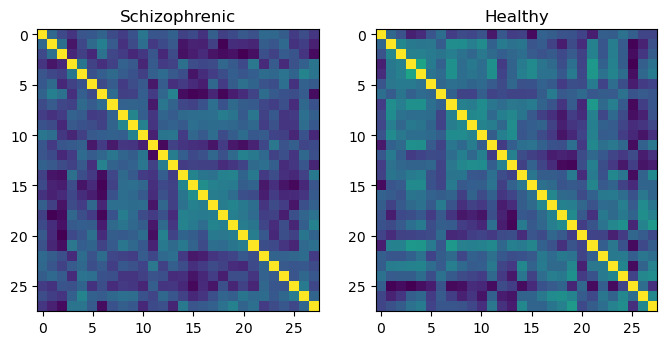

In [19]:
labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0]); ax.set_title(labels_str[labels[0]])
ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1]); ax.set_title(labels_str[labels[1]])
plt.show()

We verify that the connectomes in `data` belong to the manifold of SPD matrices.

In [20]:
from geomstats.geometry.spd_matrices import SPDMatrices

spd_manifold = SPDMatrices(n=28)
spd_manifold.belongs(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Classification Method 1: Tangent Machine Learning

### Recall: Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
1. Compute the Fréchet mean $\bar{x}$ of the data points
2. Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
3. Compute the Logarithms of the data points at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\color{#EF5645}{\text{In practice}}$: 
- Either use `FrechetMean` and `metric.log` methods.
- Or `ToTangentSpace` does both.

1. Modelling

- $\color{#EF5645}{\text{Decide on the model:}}$ Function $f_\theta$, that outputs $\hat y = f_\theta(X)$: prediction for $y$.
- $\color{#EF5645}{\text{Decide on a loss function:}}$ $L(y, \hat y)$ that evaluates if the model is right or wrong.

$\color{#047C91}{\text{Example}}$: 
- Use `ToTangentSpace`.
- Use any classifier from `scikit-learn`, e.g. `LogisticRegression`.
  - `LogisticRegression` comes with its loss function.

In [22]:
from geomstats.learning.preprocessing import ToTangentSpace
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("classifier", LogisticRegression(C=2)),
    ]
)

2. $\color{#EF5645}{\text{Split dataset into train / test sets:}}$ 
   - Train $(X_1, y_1), ..., (X_{n_\text{train}}, y_{n_\text{train}})$: build the algorithm
   - Test $(X_{n_\text{train}+1}, y_{n_\text{train}+1}), ..., (X_n, y_n)$: assess its performances.

In [24]:
from sklearn.model_selection import train_test_split

X = data; y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"The dataset has {len(X)} connectomes.")
print(f"The train set has {len(X_train)} connectomes.")
print(f"The test set has {len(X_test)} connectomes.")

The dataset has 86 connectomes.
The train set has 64 connectomes.
The test set has 22 connectomes.


3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm
   - Also called: "Fitting the model's parameters $\theta$."
   - Find $\theta^*$ such that the model predicts the train set best: 
   $$\theta^* = \text{argmin}_\theta \sum_{i=1}^{n_\text{train}} L(y_i, f_\theta(X_i))$$

In [25]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('trick_tangent_space',
                 ToTangentSpace(geometry=<geomstats.geometry.spd_matrices.SPDAffineMetric object at 0x7fe639e1d9a0>)),
                ('classifier', LogisticRegression(C=2))])

4. $\color{#EF5645}{\text{Test:}}$ Assess its performances: 
   - Loss on test set: $\sum_{i=n_\text{train}+1}^{n} L(y_i, f_\theta(X_i))$

In [26]:
print(f"We get an accuracy of {lr_pipeline.score(X_test, y_test):.2f}.")

We get an accuracy of 0.77.


Recall our question.

$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

We can use the fitted model to make new predictions.

In [27]:
[labels_str[i] for i in lr_pipeline.predict(X_test)]

['Healthy',
 'Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic']

$\color{#EF5645}{\text{Remark}}$: We can use any classifier available in `scikit-learn`: not necessarily the `LogisticRegression` classifier.

$\color{#047C91}{\text{Example}}$: Re-run the methods with a new classifier, e.g. "SVC" which stands for Support Vector Classifier, which is another classifier.

In [28]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("classifier", SVC(C=1.)),
    ]
)

svc_pipeline.fit(X_train, y_train)
print(f"We get an accuracy of {svc_pipeline.score(X_test, y_test):.2f}.")

We get an accuracy of 0.82.


Here, accuracy is comparable than with logistic regression.

## Classification Method 2: Minimum Distance to Mean

### Why another classification method?

$\color{#EF5645}{\text{Previous subsection}}$: Classification Method 1:
- "Project" data on the tangent space at the FrechetMean: `ToTangentSpace`.
- Apply any traditional classification algorithm: e.g. `LogisticRegression` or `SVC`.

$\color{#EF5645}{\text{This subsection}}$: Classification Method 2:
- Keep data on the manifold

## Minimum Distance to Mean


General idea:
- Train: Compute the mean of each class, in the train set using `FrechetMean`.
- Test: Give label of the class whose mean is the "closest" to the new data point, using `metric.dist`.

<center><img src="figs/03_mdm.png" width=600px alt="default"/></center>

1. Modeling
- $\color{#EF5645}{\text{Decide on the model:}}$ Function $f_\theta$, that outputs $\hat y = f_\theta(X)$: prediction for $y$.
- $\color{#EF5645}{\text{Decide on a loss function:}}$ $L(y, \hat y)$ that evaluates if the model is right or wrong.
  - `RiemannianMinimumDistanceToMean` comes with its loss function.

In [29]:
from geomstats.learning.mdm import RiemannianMinimumDistanceToMean

mdm = RiemannianMinimumDistanceToMean(
    riemannian_metric=spd_manifold.metric)

3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm
   - Also called: "Fitting the model's parameters $\theta$."
   - Here: compute the Fréchet means of each class (two classes).

In [30]:
mdm.fit(X_train, y_train)

4. $\color{#EF5645}{\text{Test:}}$ Assess its performances: 
   - Loss on test set: $\sum_{i=n_\text{train}+1}^{n} L(y_i, f_\theta(X_i))$

In [31]:
mdm.score(X_test, y_test)

0.7727272727272727

In this case, computing with the data on the manifold directly give similar results.

Recall our question.

$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

We can use the fitted model to make new predictions.

In [32]:
[labels_str[i] for i in mdm.predict(X_test)]

['Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Schizophrenic',
 'Healthy',
 'Schizophrenic',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic']

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - **B) Classification**
    - Motivation: Shape of Schizophrenia
    - Classification Method 1: Tangent ML
    - Classification Method 2: Minimum Distance to Mean
  - C) Regression
  - D) Clustering
  - E) Dimension Reduction